# Gridworld Example 

In [1]:
from src.plot import Plot
from src.gridworld_environment import GridWorld_Environment
from src.td_agent import TDAgent
from src.rlglue.rl_glue import RLGlue
import numpy as np
import argparse
from src.policies import Policy

In [2]:
def parse_args():
        parser = argparse.ArgumentParser(
            description = 'gridworld')

        parser.add_argument('--random', default=False,
                            help='initialize random')

        parser.add_argument('--height', type=int, default=4,
                        help = 'initialize height')
    
        parser.add_argument('--width', type=int, default=4,
                        help='initialize width')
    
        parser.add_argument('--actions', type=int, default=4,
                        help='left, up, right, down') 

        parser.add_argument('--obstacles', default = True,
                            help='initialize random obstacles')
    
        parser.add_argument('--random_teminal_state', default = False,
                            help='initialize random terminal state')

        return parser.parse_args()

In [3]:
def env_sanity_check(env, height, width):
    '''
    perform a sanity check of the environment prior to start experiment
    '''
        
    # generate some random coordinates within the grid
    idx_h = np.random.randint(height)
    idx_w = np.random.randint(width)
        
    # check that the state index is correct
    state = env.state((idx_h, idx_w))
    correct_state = width * idx_h + idx_w

    if state == correct_state:
        passed = 'Environment: {}'.format('Ok')
    else:
        passed = 'Environment: {}'.format('Not Ok')
    
    return passed

def agent_sanity_check(agent):
    agent.values = np.array([0., 1.])
    agent.agent_start(0)

    # reward = -1
    # next_state = 1
    # agent.agent_step(reward, next_state)

    if (np.isclose(agent.values[0], -0.001) and np.isclose(agent.values[1], 1.)):
        passed = 'Agent: {}'.format('Ok')  
    else: 
        passed = 'Agent: {}'.format('Not Ok')
    
    return passed 


In [4]:
def round_and_reshape(V):
    for i, val in enumerate(V):
        V[i] = round(V[i], 2)

    V_reshape = np.reshape(V, (env.width, env.height))
    return V_reshape

In [5]:
def generate_data(height, width, terminal_state, obstacle_state):
    data = np.full((height, width), -1)

    for i in terminal_state:
        data[i] = 5 

    if obstacle_state != None:
        for i in obstacle_state:
            data[i] = -10        

    return data

In [6]:
# args = parse_args()

random = False
random_teminal_state = False
random_obstacle_state = False
default_height = 4
default_width  = 4
    
if random:
        
    height = np.random.randint(4, 10)
    width = np.random.randint(4, 10)
else:
        
    height = default_height
    width = default_width

if random_teminal_state:
    terminal_state = [(np.random.randint(1, height), np.random.randint(1, width))]   
else:    
    # terminal_state = [(height - 1, width - 1)]
    terminal_state = [(0, 0), (height - 1, width - 1)]

if random_obstacle_state:
    obstacle_state = None   
else:    
    obstacle_state = [(1, 1), (1, 2)] 

# hyperparameters
params = {'episodes': 50,
          'gamma': 1.0,
          'epsilon': 0.08,
          'theta': 0.00001
             }

actions = 4 # left, up, right, down

In [7]:
#region Environment setup
# ==========================================================
env = GridWorld_Environment()
env.env_init({ "grid_height": height, "grid_width": width, "actions": actions, "terminal": terminal_state, "obstacle": obstacle_state  })
env.agent_loc = (0, 0)   

# print('States: {}'.format(env.S)) 
# print('Actions: {}'.format(env.A))

print('Env. height x width: {0} x {1}'.format(height, width))
print('Terminal_state: {}'.format(terminal_state))
print(env_sanity_check(env, height, width))
#endregion Environment setup

Env. height x width: 4 x 4
Terminal_state: [(0, 0), (3, 3)]
Environment: Ok


In [8]:
#region Agent setup 
# ==========================================================
    
agent = TDAgent()
agent.agent_init({"policy": Policy(env), "discount": 0.99, "step_size": 0.1})

print('\nStates: {0} à Actions: {1}'.format(len(env.S), len(env.A)))
# print(agent.get_policies()[0])
# print(agent_sanity_check(agent))
#endregion Agent setup


States: 16 à Actions: 4


In [9]:

# Policy Evaluation
# ==========================================================

# initialization 
gamma = params.get('gamma')
theta = params.get('theta')
V = agent.values
policies = agent.policies
policy_converged = False
    
iteration_cnt = 0
policy = agent.get_policy()
plot = Plot()
    
threshold = 500    
while (iteration_cnt < 5): # (not policy_converged) | 
    iteration_cnt += 1
    
    # Perform policy evaluation
    V = policy.evaluate(env, V, policies, gamma, theta)
        
    V_reshaped = round_and_reshape(V)
    if iteration_cnt == threshold:
        print("\nPolicy Iteration {}".format(iteration_cnt))
        threshold += 1000
        print(V_reshaped)
    print("\nPolicy Iteration {}".format(iteration_cnt))
    

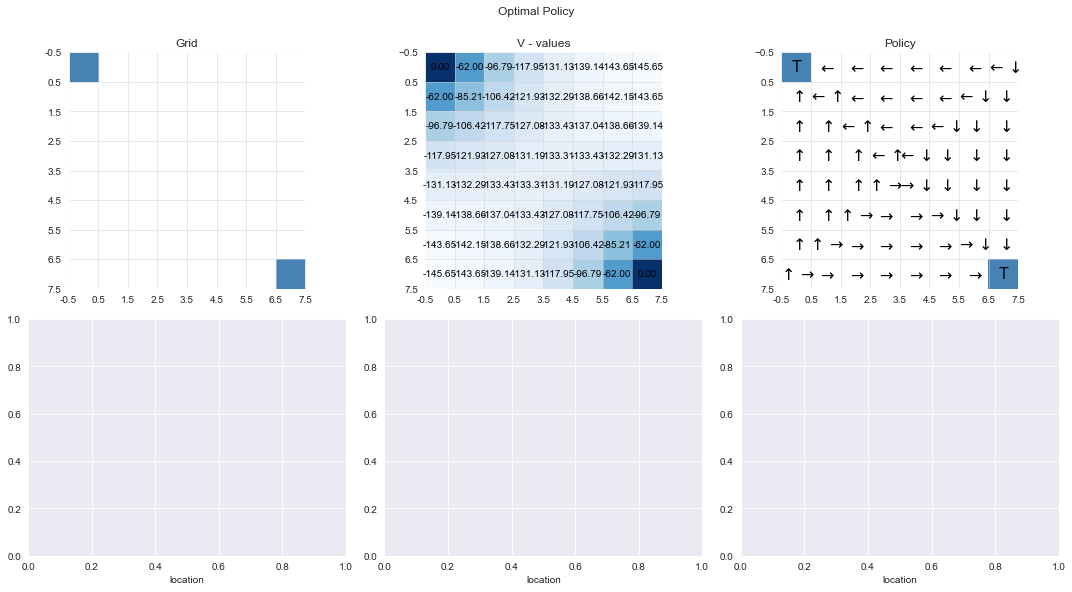

In [44]:
# Perform policy improvement      
pi, policy_converged = policy.improve(env, V, policies, gamma)

V, pi = policy.iteration(env, gamma, theta)

data = generate_data(height, width, terminal_state) 
plot.dashboard(data, env, V_reshaped, pi)